In [1]:
import scipy.io as spio
import numpy as np
import sys, os

import matplotlib.pyplot as plt
import math

In [2]:
def convert_data2org(cur_mat, maxV = 25.0):
    import numpy as np
    cur_mat = cur_mat * maxV;
    x = np.exp(cur_mat) - 1.0;

    #print "\nmin \t max"
    #print np.amin(x), np.amax(x)

    neg_idx = x < 0.0
    x[neg_idx] = 0.0

    #print "\nmin \t max"
    #print np.amin(x), np.amax(x)
    
    return x

def plot_results(noisy, nn_output, clean, title=None):
    import numpy as np
    plt.figure(1, figsize=(20,20))
    #if title: plt.suptitle(title, fontsize=16)

    ax = plt.subplot(1, 3, 1)
    ax.set_title("noisy")
    # ax.imshow(np.log10(noisy), clim=(-3,7), interpolation='none')
    ax.imshow(np.log10(noisy), interpolation='none')
        
    ax = plt.subplot(1, 3, 2)
    ax.set_title("Neural Nets")
    # ax.imshow(np.log10(nn_output), clim=(-3,7), interpolation='none')
    ax.imshow(np.log10(nn_output), interpolation='none')
    
    ax = plt.subplot(1, 3, 3)
    ax.set_title("clean")
    # ax.imshow(np.log10(clean), clim=(-3,7), interpolation='none')
    ax.imshow(np.log10(clean), interpolation='none')

    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.9, top=0.88, wspace=0.2, hspace=0.2)
    #plt.subplot_tool()
    plt.show()

### homo

In [3]:
def compute_snr(matfile):
    dat_px = spio.loadmat(matfile, squeeze_me=True)
    dat_px = dat_px['data']

    # each data array is 4D tensor (x , y, z, samples)
    samples = dat_px.shape[-1]
    
    snr_array = np.zeros((samples, 100), dtype=np.float32)
    
    for i in xrange(samples):
        img50 = dat_px[:,49,:,i]  # for current example, take the 50 image along the y-axis
        vect_mid = img50[49,:]
        snr_array[i,:] = vect_mid

    means = np.mean(snr_array, axis=0)
    stds  = np.std(snr_array, axis=0)
    snr_result = 20. * np.log10(means / stds)
    
    return snr_result

In [4]:
snr_dir = '/space/neza/2/users/yaoshen/NEU/Research/MRI filtering/mcxlab_nightlybuild/data'

In [5]:
#
# read snr data set
#

p5_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_homo_1e5_pack1.mat')
p6_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_homo_1e6_pack1.mat')
p7_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_homo_1e7_pack1.mat')
p8_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_homo_1e8_pack1.mat')

In [17]:
# for i in p5_snr: print i
# for i in p6_snr: print i
# for i in p7_snr: print i
# for i in p8_snr: print i

### NN model output

In [18]:
def compute_snr_from_array(nn_hom1e5):
    [samples, im_w, im_h] = nn_hom1e5.shape
    snr_array = np.zeros((samples, im_h), dtype=np.float32)

    for i in xrange(samples):
        vect_mid = nn_hom1e5[i,49,:]  # take the 50th vector of 100x100
        snr_array[i,:] = vect_mid  # save 100

    means = np.mean(snr_array, axis=0)
    stds  = np.std(snr_array, axis=0)
    snr_result = 20. * np.log10(means / stds)
    
    return snr_result

In [19]:
nn_hom1e5 = spio.loadmat('../test_results/snr_hom1e5_nn.mat', squeeze_me=True)
nn_hom1e5 = nn_hom1e5['output_clean']
print nn_hom1e5.shape
nn_hom1e5 = convert_data2org(nn_hom1e5) # convert back to original format

nn_snr = compute_snr_from_array(nn_hom1e5)

(100, 100, 100)


In [21]:
# for i in nn_snr: print i

### absorber3

In [22]:
#
# read snr data set
#
p5_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_absorber3_1e5_pack1.mat')
p6_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_absorber3_1e6_pack1.mat')
p7_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_absorber3_1e7_pack1.mat')
p8_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_absorber3_1e8_pack1.mat')

In [27]:
# for i in p5_snr: print i
# for i in p6_snr: print i
# for i in p7_snr: print i
# for i in p8_snr: print i

In [28]:
#
# neural nets
#
nn_result = spio.loadmat('../test_results/snr_absorb1e5_nn.mat', squeeze_me=True)
nn_result = nn_result['output_clean']
print nn_result.shape
nn_result = convert_data2org(nn_result) # convert back to original format

nn_snr = compute_snr_from_array(nn_result)

(100, 100, 100)


In [30]:
# for i in nn_snr: print i

### refractive

In [31]:
#
# read snr data set
#
p5_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_refractive_1e5_pack1.mat')
p6_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_refractive_1e6_pack1.mat')
p7_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_refractive_1e7_pack1.mat')
p8_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_refractive_1e8_pack1.mat')

In [36]:
# for i in p5_snr: print i
# for i in p6_snr: print i
# for i in p7_snr: print i
# for i in p8_snr: print i

In [37]:
#
# neural nets
#
nn_result = spio.loadmat('../test_results/snr_refractive1e5_nn.mat', squeeze_me=True)
nn_result = nn_result['output_clean']
print nn_result.shape
nn_result = convert_data2org(nn_result) # convert back to original format

nn_snr = compute_snr_from_array(nn_result)

(100, 100, 100)


In [39]:
# for i in nn_snr: print i

### show image 

(100, 100, 100)


/home/users/leiming/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10
/home/users/leiming/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10


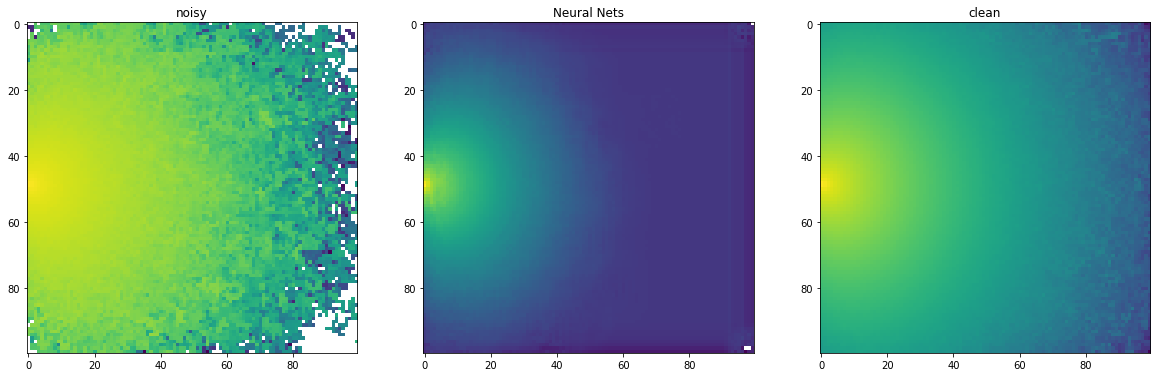

In [49]:
# =====================
#  homo
# =====================
noisy_mat = spio.loadmat(snr_dir + '/journal2_50ns_vol100_homo_1e5_pack1.mat', squeeze_me=True)
noisy_mat = noisy_mat['data']
noisy_img = noisy_mat[:,49,:,0]  # 100x100


clean_mat = spio.loadmat(snr_dir + '/journal2_50ns_vol100_homo_1e8_pack1.mat', squeeze_me=True)
clean_mat = clean_mat['data']
clean_img = clean_mat[:,49,:,0]  # 100x100


nn_hom1e5 = spio.loadmat('../test_results/snr_hom1e5_nn.mat', squeeze_me=True)
nn_hom1e5 = nn_hom1e5['output_clean']
print nn_hom1e5.shape
nn_img = convert_data2org(nn_hom1e5) # convert back to original format
nn_img = nn_img[0,...]

plot_results(noisy_img, nn_img, clean_img)